# Tutorial

### Get thermodynamic and material properties using Chemical objects

Chemical objects are an extension of the [thermo.Chemical](http://thermo.readthedocs.io/en/latest/thermo.chemical.html) class from the Chemical Engineering Design Library.

Initiallize a Chemical object with an ID:

In [1]:
from biosteam import Chemical
Water = Chemical('Water')
Water

<Chemical: Water>

Chemical objects have a temperature `T`, pressure `P`, and `phase`:

In [2]:
Water.T, Water.P, Water.phase

(298.15, 101325, 'l')

All biosteam objects have a `show` method:

In [3]:
Water.show()

Chemical: Water
 phase: 'l', T: 298.15 K, P: 101325 Pa


You can change the units for `show`:

In [4]:
Water.show(T='degC', P='atm')

Chemical: Water
 phase: 'l', T: 25 degC, P: 1 atm


Chemical objects contain thermodynamic properties:

In [5]:
Water.rho # (kg/m3)

997.0247522552814

These properties are dependent on temperature (T), pressure (P) and phase:

In [6]:
Water.T = 350 # (Kelvin)
Water.rho # (kg/m3)

971.4427816206321

`Note how the density changed with temperature`

Many more material properties are available. Please read the [thermo.Chemical](http://thermo.readthedocs.io/en/latest/thermo.chemical.html) documentation to learn more.

### Group Chemical objects with a Species object

Initiallize a [Species](https://biosteam.readthedocs.io/en/latest/Species.html) object with IDs:

In [7]:
from biosteam import Species
species = Species('Methanol', 'Glycerol')
species

<Species: Methanol, Glycerol>

The Chemical objects are stored as attributes:

In [8]:
species.Methanol, species.Glycerol

(<Chemical: Methanol>, <Chemical: Glycerol>)

Set chemical attributes:

In [9]:
species.Water = Water
species

<Species: Methanol, Glycerol, Water>

### Material flows and mixture properties with Stream objects

First set the working species of all [Stream](https://biosteam.readthedocs.io/en/latest/Stream.html) objects:

In [10]:
from biosteam import Stream
Stream.species = species # From before

A Stream is initialized with an ID, specie-flow rate pairs, temperature, pressure and phase:

In [11]:
feed = Stream(ID='feed', Methanol=1, Glycerol=2, Water=3)
feed.show()

Stream: feed
 phase: 'l', T: 298.15 K, P: 101325 Pa
 flow (kmol/hr): Methanol  1
                 Glycerol  2
                 Water     3


Alternatively, flow rates can be given as an iterable:

In [12]:
feed = Stream(ID='feed', flow=(1,2,3), T=300, P=101325)
feed.show() 

Stream: feed
 phase: 'l', T: 300 K, P: 101325 Pa
 flow (kmol/hr): Methanol  1
                 Glycerol  2
                 Water     3


The units can be changed for `show`:

In [13]:
feed.show(flow='kg/hr', T='degC', P='atm')

Stream: feed
 phase: 'l', T: 26.85 degC, P: 1 atm
 flow (kg/hr): Methanol  32
               Glycerol  184
               Water     54


Flow rates can be conviniently get and set:

In [14]:
feed.setflow(Water=50, units='kg/hr')
feed.getflow('Methanol', 'Water', units='kg/hr')

array([32.04186, 50.0], dtype=object)

Stream objects contain T, P, and phase dependent properties:

In [15]:
feed.H # kJ/hr with reference at STP

1346.6344313289649

In [16]:
feed.T = 350
feed.H

39278.51231052598

Vapor liquid equilibrium is just a line away:

In [17]:
feed.T = 350
feed.VLE()
feed.show()

MixedStream: feed
 phase: 'l', T: 350.19 K, P: 101325 Pa
         species   kmol/hr
 liquid: Methanol  1
         Glycerol  2
         Water     2.78


In [18]:
feed.VLE(V=0.5) # Set molar vapor fraction
feed.show()

MixedStream: feed
 phase: 'lg', T: 381.94 K, P: 101325 Pa
         species   kmol/hr
 liquid: Methanol  0.227
         Glycerol  2
         Water     0.662

 vapor:  Methanol  0.773
         Glycerol  0.00096
         Water     2.11


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\zeros.py:195: RuntimeWarning: Tolerance of 5.765637638432963e-07 reached
  warnings.warn(msg, RuntimeWarning)


The stream is cast to a [MixedStream](https://biosteam.readthedocs.io/en/latest/MixedStream.html) object. Mixed streams contain multiple phases:

In [19]:
feed.phase

'lg'

Please refer to the [MixedStream Example](https://biosteam.readthedocs.io/en/latest/MixedStream%20Example.html) for a detailed example.

### Find design requirements and cost with Unit objects

[Creating a Unit](https://biosteam.readthedocs.io/en/latest/Creating a Unit.html) can be flexible. But in summary, a [Unit](https://biosteam.readthedocs.io/en/latest/Unit.html) object is initialized with an ID, and unit specific arguments:

In [20]:
from biosteam.units import Flash
# Specify vapor fraction and isobaric conditions
F1 = Flash('F1', V=0.5, P=101325) 

By default, missing streams are given to inputs, `ins`, and empty streams to outputs, `outs`:

In [21]:
F1.show()

Flash: F1
ins...
[0] Missing Stream
outs...
[0] d1
    phase: 'g', T: 298.15 K, P: 101325 Pa
    flow: 0
[1] d2
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow: 0


In [22]:
F1.ins

[<MissingStream>]

In [23]:
F1.outs

[<Stream: d1>, <Stream: d2>]

You can connect streams by setting the `ins` and `outs`:

In [24]:
F1.ins[0] = Stream(Water=220, Glycerol=180)
F1.show()

Flash: F1
ins...
[0] d4
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow (kmol/hr): Glycerol  180
                    Water     220
outs...
[0] d1
    phase: 'g', T: 298.15 K, P: 101325 Pa
    flow: 0
[1] d2
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow: 0


To simulate the flash, use the `simulate` method:

In [25]:
F1.simulate()
F1.show()

Flash: F1
ins...
[0] d4
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow (kmol/hr): Glycerol  180
                    Water     220
outs...
[0] d1
    phase: 'g', T: 416.81 K, P: 101325 Pa
    flow (kmol/hr): Glycerol  0.72
                    Water     199
[1] d2
    phase: 'l', T: 416.81 K, P: 101325 Pa
    flow (kmol/hr): Glycerol  179
                    Water     20.7


C:\Users\yoelr\Dropbox\Cortes-Pena-Guest_Shared\Code\biosteam\biosteam\units\flash.py:222: DesignWarning: @Flash F1: Vertical vessel weight (3772 lb) is out of bounds (4200 to 1e+06 lb).
  out = self._vertical()


Note that some design methods have bounds that warn when calculations may be inaccurate. These bounds are stored in the class:

In [26]:
Flash._bounds

{'Vertical vessel weight': array([   4200., 1000000.]),
 'Horizontal vessel weight': array([  1000., 920000.]),
 'Diameter': array([ 3, 21]),
 'Vertical vessel Length': array([12, 40])}

The `results` method returns simulation results:

In [27]:
F1.results() # Default returns DataFrame object with units

Flash                                  Units        F1
Medium pressure steam Duty             kJ/hr  1.88e+07
                      Flow             kg/hr       504
                      Cost            USD/hr       139
Design                SepType                 Vertical
                      Length              ft      18.5
                      Diameter            ft       4.5
                      Weight              lb  3.77e+03
                      Wall thickness      in     0.312
Cost                  Vessel             USD  3.68e+04
                      Heat exchanger     USD  1.97e+04
Purchase cost                            USD  5.65e+04
Utility cost                          USD/hr       139

In [28]:
F1.results(with_units=False) # Returns Series object without units

Medium pressure steam  Duty              1.88e+07
                       Flow                   504
                       Cost                   139
Design                 SepType           Vertical
                       Length                18.5
                       Diameter               4.5
                       Weight            3.77e+03
                       Wall thickness       0.312
Cost                   Vessel            3.68e+04
                       Heat exchanger    1.97e+04
Purchase cost                            5.65e+04
Utility cost                                  139
Name: F1, dtype: object

All heat related utilities are in `heat_utilities`:

In [29]:
F1.heat_utilities

[<Medium pressure steam: 1.88e+07 kJ/hr, 504 kmol/hr, 139 USD/hr>]

In [30]:
heat_utility = F1.heat_utilities[0]
heat_utility.show()

HeatUtility: Medium pressure steam
 duty: 1.88e+07 kJ/hr
 flow: 504 kmol/hr
 cost: 139 USD/hr


Please refer to [HeatUtility](https://biosteam.readthedocs.io/en/latest/HeatUtility.html) for a detailed example.

### Solve recycle loops and process specifications with System objects

**Designing a chemical process is no easy task. A simple recycle process consisting of a flash with a partial liquid recycle is presented here.**

Create a [Mixer](https://biosteam.readthedocs.io/en/latest/Mixer.html) object and a [Splitter](https://biosteam.readthedocs.io/en/latest/Splitter.html) object:

In [31]:
from biosteam.units import Mixer, Splitter
M1 = Mixer('M1')
S1 = Splitter('S1', split=0.5) # Split to 0th output stream
F1.outs[0].ID = 'product'

Connect streams and make a recycle loop using [-pipe- notation](https://biosteam.readthedocs.io/en/latest/Using -pipe- notation.html):

In [32]:
feed = Stream('feed', Glycerol=80, Water=400)

# Broken down -pipe- notation
[S1-0, feed]-M1     # M1.ins[:] = [S1.outs[0], feed]
M1-F1               # F1.ins[:] = M1.outs
F1-1-S1             # S1.ins[:] = F1.outs[1]

# All together
[S1-0, feed]-M1-F1-1-S1

<Splitter: S1>

Create [System](https://biosteam.readthedocs.io/en/latest/System.html) object by specifying an ID, a `recycle` stream and a `network` of units:

In [33]:
from biosteam import System
sys1 = System('sys1', network=(M1, F1, S1), recycle=S1-0) # recycle=S1.outs[0]
sys1.show()

System: sys1
 recycle: d6
 network: (M1, F1, S1)
 convergence error: Flow rate   0.00e+00 kmol/hr
                    Temperature 0.00e+00 K
 iterations: 0


View the System object as a Graphviz diagram:

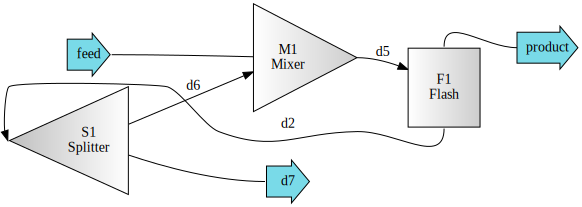

In [34]:
sys1.diagram() 

Simulate the System object:

In [35]:
sys1.simulate()
sys1.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\zeros.py:195: RuntimeWarning: Tolerance of 5.582530206993397e-07 reached
  warnings.warn(msg, RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\zeros.py:195: RuntimeWarning: Tolerance of 9.733344086271245e-08 reached
  warnings.warn(msg, RuntimeWarning)


System: sys1
 recycle: d6
 network: (M1, F1, S1)
 convergence error: Flow rate   3.55e-02 kmol/hr
                    Temperature 2.64e-03 K
 iterations: 7


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\zeros.py:195: RuntimeWarning: Tolerance of -3.125683178950567e-08 reached
  warnings.warn(msg, RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\zeros.py:195: RuntimeWarning: Tolerance of -8.274480478576152e-08 reached
  warnings.warn(msg, RuntimeWarning)
C:\Users\yoelr\Dropbox\Cortes-Pena-Guest_Shared\Code\biosteam\biosteam\units\flash.py:222: DesignWarning: @Flash F1: Vertical vessel weight (4068 lb) is out of bounds (4200 to 1e+06 lb).
  out = self._vertical()


In [36]:
F1.show()

Flash: F1
ins...
[0] d5  from  Mixer-M1
    phase: 'l', T: 326.58 K, P: 101325 Pa
    flow (kmol/hr): Glycerol  160
                    Water     480
outs...
[0] product
    phase: 'g', T: 376.18 K, P: 101325 Pa
    flow (kmol/hr): Glycerol  0.061
                    Water     320
[1] d2  to  Splitter-S1
    phase: 'l', T: 376.18 K, P: 101325 Pa
    flow (kmol/hr): Glycerol  160
                    Water     160


In [37]:
F1.results()

Flash                               Units        F1
Low pressure steam Duty             kJ/hr  1.86e+07
                   Flow             kg/hr       475
                   Cost            USD/hr       113
Design             SepType                 Vertical
                   Length              ft      15.5
                   Diameter            ft       5.5
                   Weight              lb  4.07e+03
                   Wall thickness      in     0.312
Cost               Vessel             USD  3.82e+04
                   Heat exchanger     USD  2.25e+04
Purchase cost                         USD  6.06e+04
Utility cost                       USD/hr       113

In [38]:
F1.heat_utilities[0].show()

HeatUtility: Low pressure steam
 duty: 1.86e+07 kJ/hr
 flow: 475 kmol/hr
 cost: 113 USD/hr
